In [1]:
from src.arithmetic_pipeline import ArithmeticPipeline
import plotly.graph_objects as go
import random

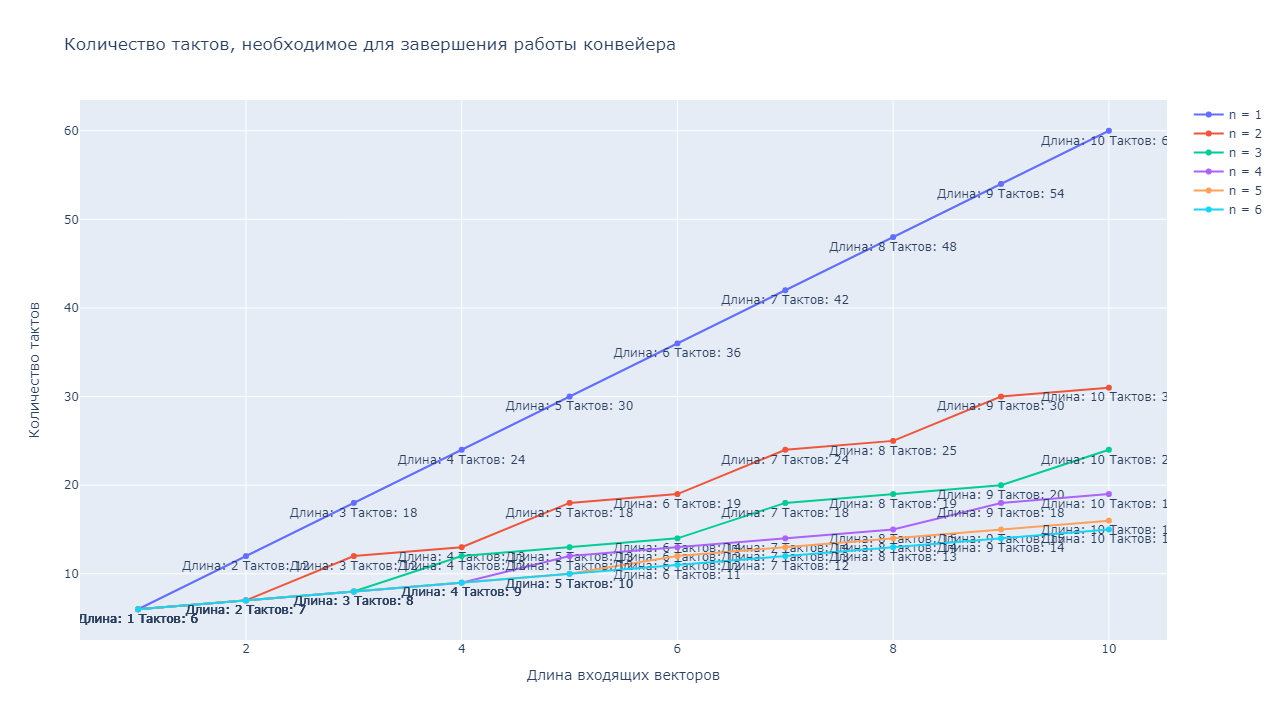

In [2]:
# Tacts amount dependency on amount of numbers in vectors
# with amount of stages n = 1, 2, 3, 4, 5, 6
x_vectors = []
y_vectors = []
for i in range(1, 7):
    x_vector = []
    y_vector = []
    for j in range(1, 11):
        vector_1 = [random.randint(0, 63) for _ in range(j)]
        vector_2 = [random.randint(0, 63) for _ in range(j)]
        pipeline = ArithmeticPipeline(vector_1, vector_2, i, 6)
        while pipeline.is_busy:
            pipeline.tact()
        x_vector.append(j)
        y_vector.append(pipeline.status['tacts_done'])
    x_vectors.append(x_vector)
    y_vectors.append(y_vector)

fig = go.Figure()
i = 1
for x, y in list(zip(x_vectors, y_vectors)):
    fig.add_trace(
        go.Scatter(x=x, y=y, mode='lines+markers+text', name=f'n = {i}',
                   text=[f'Длина: {len} Тактов: {tct}' for len, tct in list(zip(x, y))],
                   textposition='bottom center',
                   )
    )
    i += 1
fig.update_layout(title_text='Количество тактов, необходимое для завершения работы конвейера',
                  )
fig.update_xaxes(title_text='Длина входящих векторов')
fig.update_yaxes(title_text='Количество тактов')
fig.show(width=1280, height=720, autosize=True, renderer='png')

In [14]:
# Acceleration coefficient graphic (dependence on problem rank)
stages_amount = 6
x_vector = []
y_vector = []
for i in range(1, 200):
    vector_1 = [random.randint(0, 63) for _ in range(i)]
    vector_2 = [random.randint(0, 63) for _ in range(i)]
    seq_pipeline = ArithmeticPipeline(vector_1, vector_2, 1, 6)
    par_pipeline = ArithmeticPipeline(vector_1, vector_2, 6, 6)
    while seq_pipeline.is_busy:
        seq_pipeline.tact()
    while par_pipeline.is_busy:
        par_pipeline.tact()
    x_vector.append(i)
    y_vector.append(round(seq_pipeline.status['tacts_done'] / 
                          par_pipeline.status['tacts_done'], 2))
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x_vector, y=y_vector, mode='lines+markers+text',
               text=[f'r = {r}; K(r) = {y}' for r, y in enumerate(y_vector, 1)],
               textposition='bottom center')
)
fig.update_layout(title_text='Зависимость коэффициента ускорения от ранга задачи')
fig.update_xaxes(title_text='Длина входящих векторов (ранг задачи)')
fig.update_yaxes(title_text='Коэффициент ускорения K(r)')
fig.show(width=1280, height=1280, autosize=True) 

In [15]:
# Acceleration coefficient graphic (dependence on proceccing elems, based on 20 size num vector)
vector_size = 20
x_vector = []
y_vector = []
for i in range(1, 200):
    vector_1 = [random.randint(0, 63) for _ in range(vector_size)]
    vector_2 = [random.randint(0, 63) for _ in range(vector_size)]
    seq_pipeline = ArithmeticPipeline(vector_1, vector_2, 1, 6)
    par_pipeline = ArithmeticPipeline(vector_1, vector_2, i, 6)
    while seq_pipeline.is_busy:
        seq_pipeline.tact()
    while par_pipeline.is_busy:
        par_pipeline.tact()
    x_vector.append(i)
    y_vector.append(round(seq_pipeline.status['tacts_done'] / 
                          par_pipeline.status['tacts_done'], 2))
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x_vector, y=y_vector, mode='lines+markers+text',
               text=[f'n = {n}; K(n) = {y}' for n, y in enumerate(y_vector, 1)],
               textposition='bottom center')
)
fig.update_layout(title_text='Зависимость коэффициента ускорения от количества обрабатывающих элементов')
fig.update_xaxes(title_text='Количество процессорных элементов')
fig.update_yaxes(title_text='Коэффициент ускорения K(n)')
fig.show(width=1280, height=1280, autosize=True) 

In [5]:
vector_1 = [random.randint(0, 63) for _ in range(1)]
vector_2 = [random.randint(0, 63) for _ in range(1)]
par_pipeline = ArithmeticPipeline(vector_1, vector_2, 8, 6)
while par_pipeline.is_busy:
    par_pipeline.tact()
    # print(par_pipeline.status)
par_pipeline.status['tacts_done']

8

In [16]:
# Efficency coefficient graphic (dependence on problem rank)
stages_amount = 6
x_vector = []
y_vector = []
for i in range(1, 200):
    vector_1 = [random.randint(0, 63) for _ in range(i)]
    vector_2 = [random.randint(0, 63) for _ in range(i)]
    seq_pipeline = ArithmeticPipeline(vector_1, vector_2, 1, 6)
    par_pipeline = ArithmeticPipeline(vector_1, vector_2, 6, 6)
    while seq_pipeline.is_busy:
        seq_pipeline.tact()
    while par_pipeline.is_busy:
        par_pipeline.tact()
    x_vector.append(i)
    y_vector.append(round(seq_pipeline.status['tacts_done'] / 
                          (par_pipeline.status['tacts_done'] * 6), 2))
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x_vector, y=y_vector, mode='lines+markers+text',
               text=[f'r = {r}; K(r) = {y}' for r, y in enumerate(y_vector, 1)],
               textposition='bottom center')
)
fig.update_layout(title_text='Зависимость коэффициента эффективности от ранга задачи')
fig.update_xaxes(title_text='Длина входящих векторов (ранг задачи)')
fig.update_yaxes(title_text='Коэффициент эффективности e(r)')
fig.show(width=1280, height=720, autosize=True) 

In [17]:
# Efficency coefficient graphic (dependence on proceccing elems, based on 20 size num vector)
vector_size = 20
x_vector = []
y_vector = []
for i in range(1, 200):
    vector_1 = [random.randint(0, 63) for _ in range(vector_size)]
    vector_2 = [random.randint(0, 63) for _ in range(vector_size)]
    seq_pipeline = ArithmeticPipeline(vector_1, vector_2, 1, 6)
    par_pipeline = ArithmeticPipeline(vector_1, vector_2, i, 6)
    while seq_pipeline.is_busy:
        seq_pipeline.tact()
    while par_pipeline.is_busy:
        par_pipeline.tact()
    x_vector.append(i)
    y_vector.append(round(seq_pipeline.status['tacts_done'] / 
                          (par_pipeline.status['tacts_done'] * i), 2))
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x_vector, y=y_vector, mode='lines+markers+text',
               text=[f'n = {n}; K(n) = {y}' for n, y in enumerate(y_vector, 1)],
               textposition='bottom center')
)
fig.update_layout(title_text='Зависимость коэффициента эффективности от количества обрабатывающих элементов')
fig.update_xaxes(title_text='Длина входящих векторов')
fig.update_yaxes(title_text='Коэффициент эффективности e(n)')
fig.show(width=1280, height=720, autosize=True) 